### PS4 Lerong Wang

In [57]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

### 1a

In [58]:
T = 500
sigma =  0.7
unif_vec  = sts.uniform.rvs(loc=0, scale=1, size=T,random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)
rho = 0.85
mu=11.4

In [59]:
z = np.zeros(500)
for i in range(500):
    if i  ==  0:
        z[i] = rho * unif_vec[0] + (1 - rho) * mu + eps_vec[i]
    else:
        z[i] = rho * z[i-1] + (1-rho)*mu + eps_vec[i]

In [60]:
z[:100]

array([  3.23849021,   4.60812198,   5.2164978 ,   5.51887776,
         6.24374493,   6.18543692,   7.30476859,   7.80913311,
         8.44675432,   8.65202383,   8.89116037,   8.42012593,
         8.77389048,   9.31889733,   8.94063031,   9.34590613,
         9.33842967,  10.01310826,   9.98214958,  10.88059339,
        10.92575602,  11.02585647,  10.8737385 ,  12.92131757,
        12.71811919,  12.62439986,  11.16738531,  11.61012107,
        11.43907413,  11.32209193,  10.92932058,  11.89810392,
        12.13057829,  11.94375158,  11.47441936,  11.50859111,
        11.59663594,  12.02894585,  12.59795921,  13.06894091,
        11.8213986 ,  12.01822875,  11.57692535,  11.59296933,
        12.77429957,  13.4019536 ,  12.72535125,  12.54826745,
        11.43187522,  11.68122987,  10.85853018,  11.44887645,
        10.44241322,  10.28012835,  10.77520778,  10.88509369,
        11.24180585,  11.44672244,  11.84573871,  11.62898043,
        11.4110171 ,  12.06395449,  12.35695971,  11.30

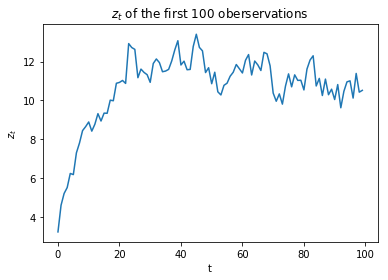

In [61]:
plt.plot(z[:100])
plt.title("$z_t$ of the first 100 oberservations")
plt.ylabel("$z_t$")
plt.xlabel("t")
plt.show()

### 1b

In [62]:
lower = mu - 3*sigma
upper = mu + 3*sigma
z_vals = np.array([lower,(mu-lower)/2+lower,mu,(upper-mu)/2+mu,upper])
print("z_vals is ", z_vals)


z_vals is  [  9.3   10.35  11.4   12.45  13.5 ]


### 1c

In [63]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
bins = np.digitize(z, z_cuts)
P = np.zeros(shape=(5,5))
for i in range(0,5):
    for j in range(0,5):
        count = 0
        denom = 0
        for k in range(0,499):
            curr = bins[k]
            nxt = bins[k+1]
            if curr == i and nxt == j:
                count += 1
            if curr == i:
                denom += 1
        P[i][j] = count/denom
print("The transition matrix is \n", P)

The transition matrix is 
 [[ 0.75757576  0.21212121  0.03030303  0.          0.        ]
 [ 0.1         0.50909091  0.34545455  0.04545455  0.        ]
 [ 0.03144654  0.22012579  0.48427673  0.2327044   0.03144654]
 [ 0.          0.04273504  0.34188034  0.5042735   0.11111111]
 [ 0.          0.          0.04255319  0.34042553  0.61702128]]


### 1d

In [64]:
t = np.array([0,0,1,0,0]).reshape(5,1)
res = LA.matrix_power(P.T,3) @ t
print('The probability is ', res[4])

The probability is  [ 0.07752374]


### 1e

In [65]:
eigvals, eigvecmat = LA.eig(P.T)
print(eigvals)

[ 0.11107399  1.          0.36137544  0.79405964  0.60572911]


In [66]:
eigvec  =  eigvecmat[:, 1] / eigvecmat[:, 1].sum()
stat_dist = eigvec
print("The stationary distribution is", stat_dist)

The stationary distribution is [ 0.13226453  0.22044088  0.31863727  0.23446894  0.09418838]


### 1f

In [67]:
z_0 = z_vals[2]
x_vec = np.zeros(T)
x_t = z_0
xt_ind = 1
for t_ind in range(T):
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(P[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    
    x_t = x_tp1
    xt_ind = xtp1_ind

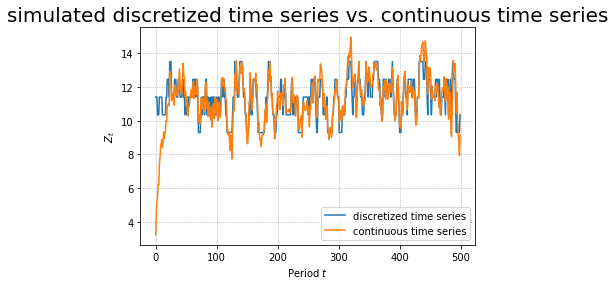

In [68]:
plt.plot(x_vec)
plt.plot(z)
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title("simulated discretized time series vs. continuous time series", fontsize=20)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.legend(['discretized time series', 'continuous time series'])
plt.show()